In [3]:
import hail as hl
from bokeh.io import show, output_notebook
output_notebook()

Loading BokehJS ...

In [21]:
mt = hl.read_matrix_table('gs://cpg-tob-wgs-test/tob_wgs_vep/v1/vep105_GRCh38.mt')
# mt = hl.experimental.densify(mt)

In [22]:
# mt = hl.filter_intervals(mt, [hl.parse_locus_interval('chr22:23704425-23802743', reference_genome='GRCh38')])
mt = hl.filter_intervals(mt, [hl.parse_locus_interval('chr22:23000000-24000000', reference_genome='GRCh38')])
# mt = mt.head(10000)
mt.count()

(34846, 1061)

In [23]:
mt = hl.sample_qc(mt)
p = hl.plot.histogram(mt.sample_qc.call_rate, legend='Call Rate')
show(p)

In [24]:
mt = hl.variant_qc(mt)
p = hl.plot.histogram(mt.variant_qc.call_rate, legend='Call Rate')
show(p)

In [6]:
# mt = mt.filter_rows(hl.len(mt.filters)==0)
# mt.count()

In [7]:
# focus on SNVs for now
mt = mt.filter_rows(mt.vep.variant_class == 'SNV')
# filter for biallelic only
mt = mt.filter_rows(hl.len(mt.alleles) == 2)
mt.count()

(7606, 1061)

In [8]:
mt = hl.sample_qc(mt)
p = hl.plot.histogram(mt.sample_qc.call_rate, legend='Call Rate')
show(p)

In [ ]:
mt = hl.variant_qc(mt)
mt = hl.filter_intervals(mt, [hl.parse_locus_interval('chr22:23704425-23802743', reference_genome='GRCh38')])
mt.count()

In [ ]:
mt = mt.filter_rows(hl.len(hl.or_else(mt.filters, hl.empty_set(hl.tstr))) == 0)
mt.count()

In [ ]:
p1 = hl.plot.histogram(mt.variant_qc.AF[1])
show(p1)

In [ ]:
mt = mt.annotate_rows(is_ref = hl.agg.filter(mt.GT.is_hom_ref(), hl.agg.collect(mt.s)))
sample = "CPG18"
donor_mt = mt.filter_cols(mt.s == sample)
donor_mt = donor_mt.filter_rows(donor_mt.is_ref.contains(sample), keep=False)
donor_mt.count()

In [ ]:
# sample = "CPG18"
# donor_mt = mt.filter_cols(mt.s == sample)
# donor_mt = donor_mt.filter_rows(hl.agg.any(donor_mt.GT.is_non_ref()))
# donor_mt.count()

In [ ]:
mt = mt.semi_join_rows(donor_mt.rows())
mt.count()

In [ ]:
p2 = hl.plot.histogram(mt.variant_qc.AF[1])
show(p2)

In [42]:
mt = hl.read_matrix_table('gs://cpg-tob-wgs-main/tob_wgs_vep/v1/vep105_GRCh38.mt')
mt = hl.filter_intervals(mt, [hl.parse_locus_interval('chr22:23704425-23802743', reference_genome='GRCh38')])
# I think this should instead be like this:
# mt = mt.filter_rows(hl.len(hl.or_else(mt.filters, hl.empty_set(hl.tstr))) == 0)
mt = mt.filter_rows(hl.len(mt.filters)==0)
mt = hl.variant_qc(mt)
p1 = hl.plot.histogram(mt.variant_qc.AF[1])
show(p1)

In [43]:
# I'm not sure if this is the best way, but if you want to remove variants for which this individual is 0/0, you can do something like this
mt = mt.annotate_rows(is_ref = hl.agg.filter(mt.GT.is_hom_ref(), hl.agg.collect(mt.s)))
sample = "CPG18"
donor_mt = mt.filter_cols(mt.s == sample)
# you don't need to use variant_qc again, since you've done it earlier
donor_mt = donor_mt.filter_rows(donor_mt.is_ref.contains(sample), keep=False)
donor_mt.count()
# I think a semi join would also work here
mt = mt.semi_join_rows(donor_mt.rows())
mt.count()
p2 = hl.plot.histogram(mt.variant_qc.AF[1])
show(p2)

In [31]:
import hail as hl
import matplotlib.pyplot as plt

In [32]:
### full object for all samples
mt = hl.read_matrix_table('gs://cpg-tob-wgs-main/tob_wgs_vep/v1/vep105_GRCh38.mt')
mt.count()

(77899783, 1061)

In [33]:
# get variants within a window (around a gene)
# mt = hl.filter_intervals(mt, [hl.parse_locus_interval('chr22:23219960-23348287', reference_genome='GRCh38')])
mt = hl.filter_intervals(mt, [hl.parse_locus_interval('chr22:23704425-23802743', reference_genome='GRCh38')])
mt.count()

(3398, 1061)

In [34]:
# mt.filter_rows(hl.len(mt.filters)>0).rows().show()

In [35]:
mt = mt.filter_rows(hl.len(mt.filters)==0)
mt.count()

(1720, 1061)

In [36]:
mt = hl.variant_qc(mt)
# plt.hist(mt.variant_qc.AF[1].collect())
# plt.show()

In [37]:
from bokeh.io import show, output_notebook
output_notebook()
p1 = hl.plot.histogram(mt.variant_qc.AF[1])
show(p1)

Loading BokehJS ...

In [38]:
### smaller object for just one sample
# donor_mt = mt.filter_cols(mt.s == 'CPG9951')
sample = "CPG18"
donor_mt = mt.filter_cols(mt.s == sample)

In [39]:
donor_mt.count()

(1720, 1)

In [40]:
donor_mt = donor_mt.filter_rows(hl.agg.any(donor_mt.GT.is_non_ref()))

In [41]:
# # remove variants for which this individual is 0/0
# donor_mt = hl.variant_qc(donor_mt)
# donor_mt = donor_mt.filter_rows(donor_mt.variant_qc.n_non_ref > 0)
donor_mt.count()

(211, 1)

In [12]:
mt = mt.semi_join_rows(donor_mt.rows())

In [13]:
mt.count()

(211, 1061)

In [14]:
# plt.hist(mt.variant_qc.AF[1].collect())
# plt.show()

In [15]:
from bokeh.io import show, output_notebook
output_notebook()
p2 = hl.plot.histogram(mt.variant_qc.AF[1])
show(p2)

Loading BokehJS ...

In [9]:
# subset main mt by selected variants
relevant_loci = donor_mt.row_key.collect()
len(relevant_loci)

211

In [10]:
# select full mt down to those variants
mt = mt.filter_rows(hl.set(relevant_loci).contains(mt.row_key))
mt.count()

(211, 1061)

In [11]:
relevant_loci[0:10]

[Struct(locus=Locus(contig=chr22, position=23704905, reference_genome=GRCh38), alleles=['T', 'C']),
 Struct(locus=Locus(contig=chr22, position=23705185, reference_genome=GRCh38), alleles=['CAGAG', 'C']),
 Struct(locus=Locus(contig=chr22, position=23705185, reference_genome=GRCh38), alleles=['CAGAGAGAG', 'C']),
 Struct(locus=Locus(contig=chr22, position=23705470, reference_genome=GRCh38), alleles=['G', 'T']),
 Struct(locus=Locus(contig=chr22, position=23707386, reference_genome=GRCh38), alleles=['T', 'C']),
 Struct(locus=Locus(contig=chr22, position=23707390, reference_genome=GRCh38), alleles=['G', 'A']),
 Struct(locus=Locus(contig=chr22, position=23707531, reference_genome=GRCh38), alleles=['T', 'C']),
 Struct(locus=Locus(contig=chr22, position=23707806, reference_genome=GRCh38), alleles=['A', 'G']),
 Struct(locus=Locus(contig=chr22, position=23708034, reference_genome=GRCh38), alleles=['C', 'T']),
 Struct(locus=Locus(contig=chr22, position=23708101, reference_genome=GRCh38), alleles=[

In [12]:
mt.row_key.collect()[0:10]

[Struct(locus=Locus(contig=chr22, position=23704905, reference_genome=GRCh38), alleles=['T', 'C']),
 Struct(locus=Locus(contig=chr22, position=23705185, reference_genome=GRCh38), alleles=['CAGAG', 'C']),
 Struct(locus=Locus(contig=chr22, position=23705185, reference_genome=GRCh38), alleles=['CAGAGAGAG', 'C']),
 Struct(locus=Locus(contig=chr22, position=23705470, reference_genome=GRCh38), alleles=['G', 'T']),
 Struct(locus=Locus(contig=chr22, position=23707386, reference_genome=GRCh38), alleles=['T', 'C']),
 Struct(locus=Locus(contig=chr22, position=23707390, reference_genome=GRCh38), alleles=['G', 'A']),
 Struct(locus=Locus(contig=chr22, position=23707531, reference_genome=GRCh38), alleles=['T', 'C']),
 Struct(locus=Locus(contig=chr22, position=23707806, reference_genome=GRCh38), alleles=['A', 'G']),
 Struct(locus=Locus(contig=chr22, position=23708034, reference_genome=GRCh38), alleles=['C', 'T']),
 Struct(locus=Locus(contig=chr22, position=23708101, reference_genome=GRCh38), alleles=[

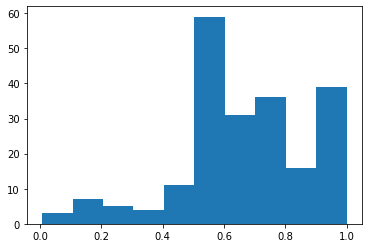

In [13]:
mt = hl.variant_qc(mt)
plt.hist(mt.variant_qc.AF[1].collect())
plt.show()

In [16]:
from bokeh.io import show, output_notebook
output_notebook()
show(hl.plot.histogram(mt.variant_qc.AF[1]))

Loading BokehJS ...

In [30]:
# focus on SNVs for now
donor_mt = donor_mt.filter_rows(donor_mt.vep.variant_class == 'SNV')
# filter for biallelic only
donor_mt = donor_mt.filter_rows(hl.len(donor_mt.alleles) == 2)

In [31]:
# subset main mt by selected variants
relevant_loci = donor_mt.row_key.collect()
len(relevant_loci)

290

In [32]:
# select full mt down to those variants
mt = mt.filter_rows(hl.set(relevant_loci).contains(mt.row_key))
mt.count()

(290, 1061)

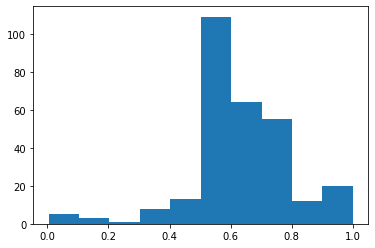

In [33]:
mt = hl.variant_qc(mt)
plt.hist(mt.variant_qc.AF[1].collect())
plt.show()

In [18]:
mt.count()

(211, 1061)

In [22]:
mt.filter_rows(mt.CPG18.is_non_ref()).count()

AttributeError: MatrixTable instance has no field, method, or property 'CPG18'
    Hint: use 'describe()' to show the names of all data fields.